<a href="https://colab.research.google.com/github/forbiddenvelocity/pneumonia-ai/blob/main/Pnuemonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:13<00:00, 223MB/s]
100% 2.29G/2.29G [00:13<00:00, 178MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import cv2

In [6]:
img = cv2.imread('content/chest-xray-pneumonia.jpg')

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(100,100)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(100,100)
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [8]:
def process(image,label):
    image = tf.cast(image/100. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
img1 = cv2.imread('/content/chest_xray/test/NORMAL/IM-0005-0001.jpeg')
img2 =cv2.imread('/content/chest_xray/test/NORMAL/IM-0015-0001.jpeg')
img3 = cv2.imread('/content/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg')
img4 = cv2.imread('/content/chest_xray/test/PNEUMONIA/person103_bacteria_489.jpeg')
img5 = cv2.imread('/content/chest_xray/train/PNEUMONIA/person1029_bacteria_2961.jpeg')

list = [img1, img2, img3, img4]

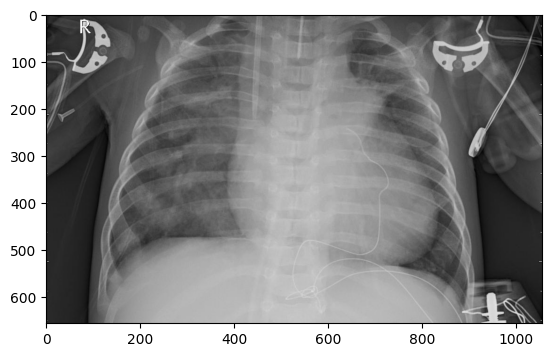

In [11]:
plt.imshow(img5)

In [12]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [14]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
163/163 [==============================] - 46s 194ms/step - loss: 0.2740 - accuracy: 0.8834 - val_loss: 0.6605 - val_accuracy: 0.7580
Epoch 2/5
163/163 [==============================] - 34s 200ms/step - loss: 0.1221 - accuracy: 0.9532 - val_loss: 0.5384 - val_accuracy: 0.8462
Epoch 3/5
163/163 [==============================] - 32s 187ms/step - loss: 0.0994 - accuracy: 0.9651 - val_loss: 1.2009 - val_accuracy: 0.7276
Epoch 4/5
163/163 [==============================] - 34s 194ms/step - loss: 0.0731 - accuracy: 0.9697 - val_loss: 0.8040 - val_accuracy: 0.7708
Epoch 5/5
163/163 [==============================] - 36s 213ms/step - loss: 0.0728 - accuracy: 0.9714 - val_loss: 1.4160 - val_accuracy: 0.7067


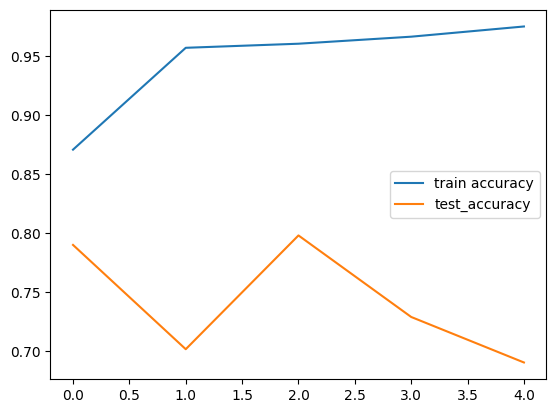

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

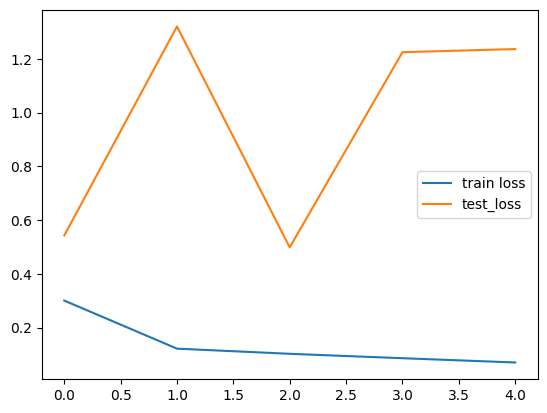

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [ ]:
print(img3.shape)

(552, 904, 3)


In [ ]:
new_img_path = '/content/chest_xray/test/PNEUMONIA/person112_bacteria_538.jpeg'
new_img = cv2.imread(new_img_path)
new_img = tf.cast(new_img/100. ,tf.float32)
new_img = tf.image.resize(new_img, (100, 100))
new_img = tf.expand_dims(new_img, axis=0)

prediction = model.predict(new_img)

if prediction[0][0] >= 0.5:
    prediction_label = 'Pneumonia'
else:
    prediction_label = 'Normal'

print(f"Prediction: {prediction_label}")

1/1 [==============================] - 0s 179ms/step
Prediction: Pneumonia


In [ ]:
new_img_path = '/content/chest_xray/test/NORMAL/IM-0010-0001.jpeg'
new_img = cv2.imread(new_img_path)
new_img = tf.cast(new_img/100. ,tf.float32)
new_img = tf.image.resize(new_img, (100, 100))
new_img = tf.expand_dims(new_img, axis=0)

prediction = model.predict(new_img)

if prediction[0][0] >= 0.5:
    prediction_label = 'Pneumonia'
else:
    prediction_label = 'Normal'

print(f"Prediction: {prediction_label}")

1/1 [==============================] - 0s 18ms/step
Prediction: Normal


In [ ]:
new_img_path = '/content/chest_xray/test/NORMAL/IM-0010-0001.jpeg'
new_img = cv2.imread(new_img_path)
new_img = tf.cast(new_img/100. ,tf.float32)
new_img = tf.image.resize(new_img, (100, 100))
new_img = tf.expand_dims(new_img, axis=0)

prediction = model.predict(new_img)

if prediction[0][0] >= 0.5:
    prediction_label = 'Pneumonia'
else:
    prediction_label = 'Normal'

print(f"Prediction: {prediction_label}")

In [16]:
new_img_path = '/content/chest_xray/train/PNEUMONIA/person1026_virus_1718.jpeg'
new_img = cv2.imread(new_img_path)
new_img = tf.cast(new_img/100. ,tf.float32)
new_img = tf.image.resize(new_img, (100, 100))
new_img = tf.expand_dims(new_img, axis=0)

prediction = model.predict(new_img)

if prediction[0][0] >= 0.5:
    prediction_label = 'Pneumonia'
else:
    prediction_label = 'Normal'

print(f"Prediction: {prediction_label}")

1/1 [==============================] - 1s 661ms/step
Prediction: Pneumonia
